In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def non_nan(df):
    return [(df.index[row], df.columns[col]) for row in range(df.shape[0]) for col in range(df.iloc[row,:].shape[0]) if not np.isnan(df.iloc[row, col])]

def get_decade(year):
    return str(year)[:3]

In [3]:
continent_df = pd.read_csv("./countryContinent.csv", encoding="latin-1")
female_ed_df = pd.read_csv("./literacy_rate_adult_female_percent_of_females_ages_15_above.csv")
male_ed_df = pd.read_csv("./literacy_rate_adult_male_percent_of_males_ages_15_above.csv")
population_df = pd.read_csv("population-by-country.csv")
female_pop_df = pd.read_csv("share-population-female.csv")

In [4]:
population_df

,Entity,Code,Year,Total population (Fink-Jensen 2015)
0,Afghanistan,AFG,1500,2000.000
1,Afghanistan,AFG,1600,2500.000
2,Afghanistan,AFG,1700,2500.000
3,Afghanistan,AFG,1800,3280.000
4,Afghanistan,AFG,1820,3280.000
...,...,...,...,...
3216,Zimbabwe,ZWE,1960,3751.000
3217,Zimbabwe,ZWE,1970,5514.536
3218,Zimbabwe,ZWE,1980,7169.968
3219,Zimbabwe,ZWE,1990,10156.000


In [5]:
female_ed_df = female_ed_df.set_index("country")
male_ed_df = male_ed_df.set_index("country")

female = non_nan(female_ed_df)
male = non_nan(male_ed_df)

female.remove(("Afghanistan", "2010"))

In [6]:
# for l in range(len(female_pop_df)):
#     col = female_pop_df.iloc[l, 2]
#     row = female_pop_df.iloc[l, 0]
    
#     if get_decade(col) in list(map(get_decade, list(population_df["Year"]))):
#         population = 
    
#     if str(col) in female_ed_df.columns and row in female_ed_df.index:
#         temp0 = female_ed_df[str(col)][row]
#         female_ed_df[str(col)][row] = str(temp0) + " " + str(female_pop_df.iloc[l, 3])
    
#     if str(col) in male_ed_df.columns and row in male_ed_df.index:
#         temp1 = male_ed_df[str(col)][row]
#         male_ed_df[str(col)][row] = str(temp1) + " " + str(100-female_pop_df.iloc[l, 3])


In [7]:
female_ed_df

,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.7,NaN
Afghanistan,NaN,NaN,NaN,NaN,4.99,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.6
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94.7,NaN,NaN,95.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,98.3,NaN,NaN,NaN,NaN,NaN,NaN,98.6
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,35.5,NaN,NaN,NaN,NaN,NaN,NaN,48.5
South Africa,NaN,NaN,NaN,NaN,NaN,74.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,92.2


In [8]:
female_ed_df = female_ed_df.merge(continent_df, left_index = True, right_on = "country", how = "left")
male_ed_df = male_ed_df.merge(continent_df, left_index = True, right_on = "country", how = "left")

In [9]:
#print(female_ed_df)

In [10]:
female_ed_df = female_ed_df.set_index("country")
male_ed_df = male_ed_df.set_index("country")
female_ed_df = female_ed_df.drop(['code_2', 'code_3', 'country_code', 'iso_3166_2', 'sub_region_code', 'region_code'], axis = 1)
male_ed_df = male_ed_df.drop(['code_2', 'code_3', 'country_code', 'iso_3166_2', 'sub_region_code', 'region_code'], axis = 1)

In [11]:
#female_ed_df

In [12]:
for i in range(len(female_ed_df)):
    if not isinstance(female_ed_df.iloc[i,37], str):
        female_ed_df.iloc[i,37] = "Other"
    if not isinstance(male_ed_df.iloc[i,37], str):
        male_ed_df.iloc[i,37] = "Other"

female_df_sub = female_ed_df.groupby("sub_region").mean()
male_df_sub = male_ed_df.groupby("sub_region").mean()

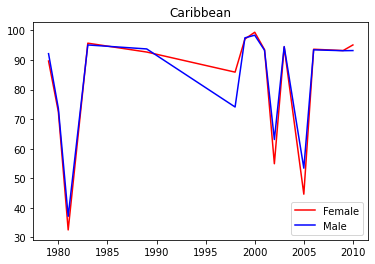

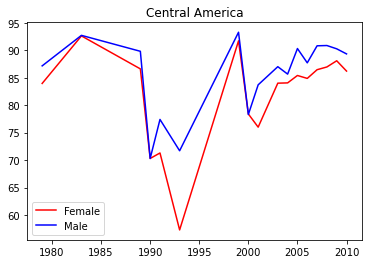

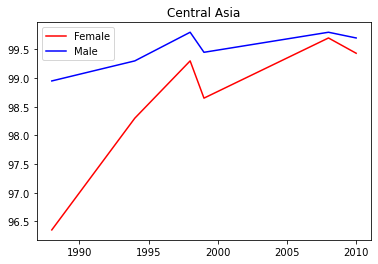

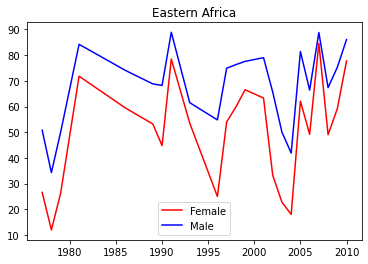

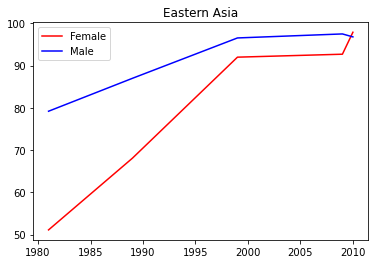

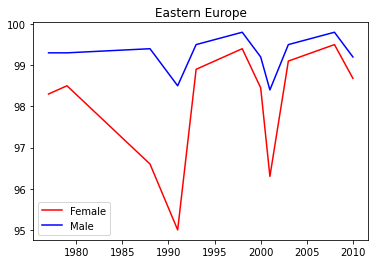

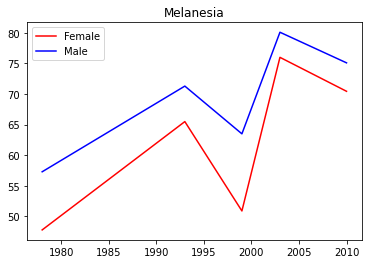

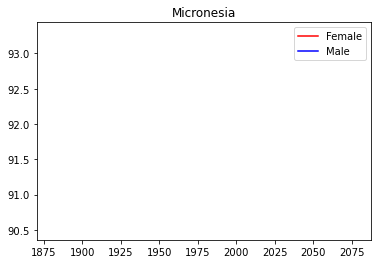

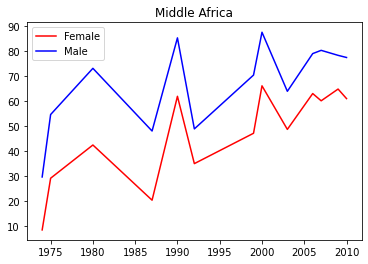

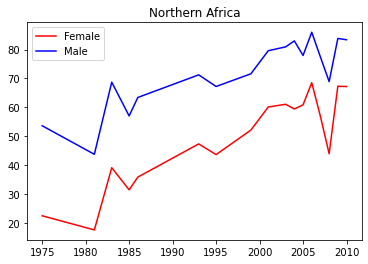

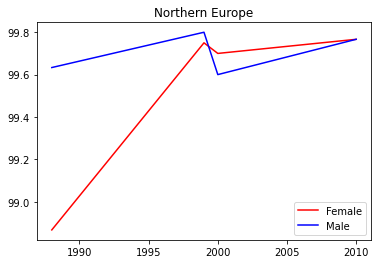

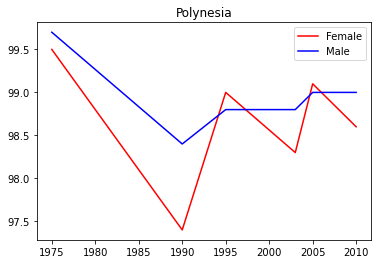

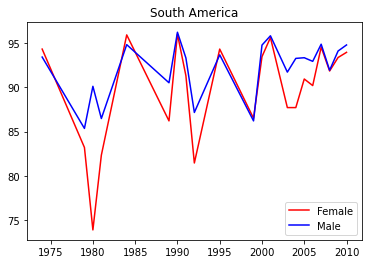

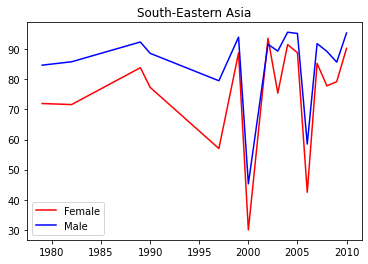

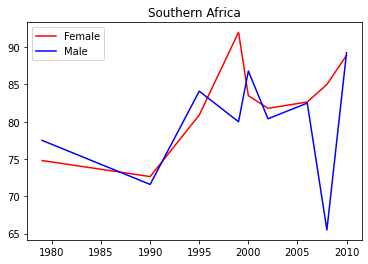

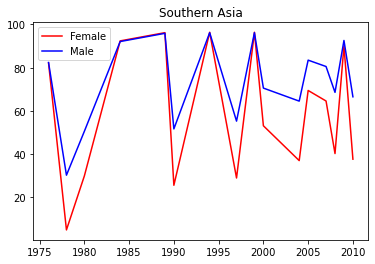

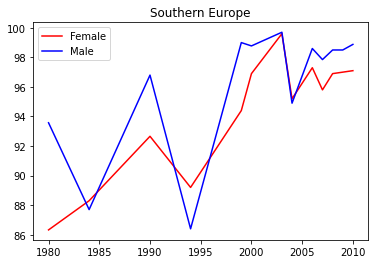

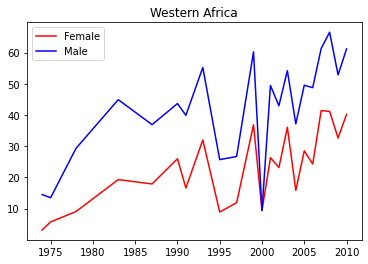

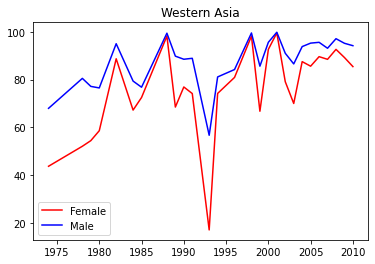

In [13]:
# =============================================================================
# for j in range(len(female_ed_df)):
#     
#     new_df0 = female_ed_df.iloc[j,:37]
#     new_df0 = new_df0[new_df0.isnull()==False]
#     new_df1 = male_ed_df.iloc[j,:37]
#     new_df1 = new_df1[new_df1.isnull()==False]
#     
#     years_female = list(pd.Series(new_df0.index).apply(int))
#     literacy_female = list(new_df0)
#     years_male = list(pd.Series(new_df1.index).apply(int))
#     literacy_male = list(new_df1)
#     plt.figure(j)
#     
#     plt.plot(years_female, literacy_female, c="red", label = "Female")
#     plt.plot(years_male, literacy_male, c="blue", label = "Male")
#     plt.legend()
#     plt.title(female_ed_df.index[j])
# =============================================================================

for j in range(len(female_df_sub)):
    
    new_df0 = female_df_sub.iloc[j,:]
    new_df0 = new_df0[new_df0.isnull()==False]
    new_df1 = male_df_sub.iloc[j,:]
    new_df1 = new_df1[new_df1.isnull()==False]
    
    years_female = list(pd.Series(new_df0.index).apply(int))
    literacy_female = list(new_df0)
    years_male = list(pd.Series(new_df1.index).apply(int))
    literacy_male = list(new_df1)
    plt.figure(j)
    
    plt.plot(years_female, literacy_female, c="red", label = "Female")
    plt.plot(years_male, literacy_male, c="blue", label = "Male")
    #plt.xticks(rotation=-90)
    plt.legend()
    plt.title(female_df_sub.index[j])

In [14]:
#female_pop_df